In [2348]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2349]:
def show(img):
    plt.figure(figsize=(7,7))
    plt.imshow(img, cmap='gray')

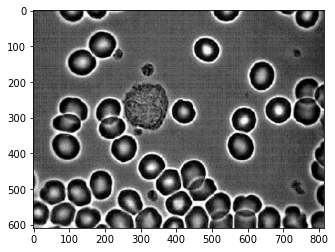

In [2350]:
img = cv2.imread('image.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.blur(gray, (7,7))
plt.imshow(gray, cmap='gray')

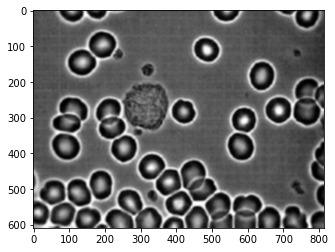

In [2351]:
blur = cv2.blur(gray, (7,7))
plt.imshow(blur, cmap='gray')

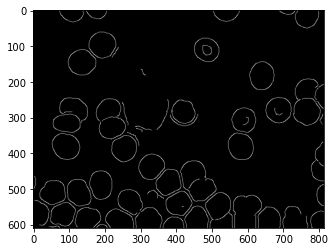

In [2352]:
canny = cv2.Canny(blur, 130, 235)
plt.imshow(canny, cmap='gray')

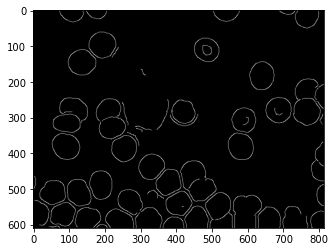

In [2353]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (6,6))
dilate = cv2.dilate(canny, kernel1)
plt.imshow(canny, cmap='gray')

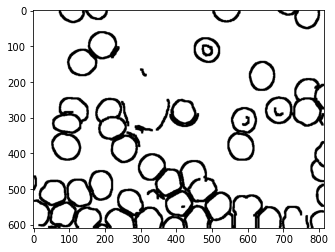

In [2354]:
hpone=np.ones(dilate.shape, dtype = 'uint8')
rule = cv2.subtract(hpone, dilate)
#kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
#rule = cv2.erode(rule, kernel2)
plt.imshow(rule, cmap='gray')

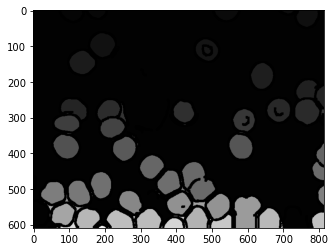

In [2355]:
_, markers = cv2.connectedComponents(rule)
plt.imshow(markers, cmap='gray')

In [2356]:
full = np.zeros(dilate.shape, dtype = 'uint8')

In [2357]:
for n in np.unique(markers):
    if n == 0 or n ==1:
        print(n)
        continue
    else:
        full[markers == n] = 255
trim = img

0
1


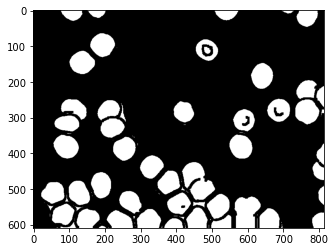

In [2358]:
plt.imshow(full, cmap='gray')

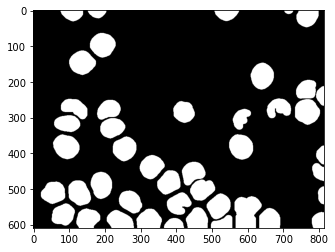

In [2359]:
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (6, 6))
kernel4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (22, 22))
kernel5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (21, 21))
res = cv2.dilate(full, kernel3)
res = cv2.erode(res, kernel4)
res = cv2.dilate(res, kernel5)
plt.imshow(res, cmap='gray')

In [2360]:
count, markers2 = cv2.connectedComponents(res)
count = count-1

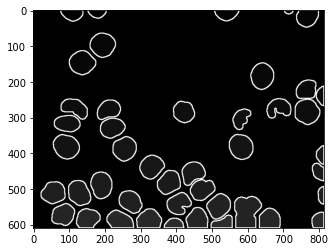

In [2361]:
markers2 = np.uint8(markers2)
contours1, hierarchy = cv2.findContours( markers2, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(markers2, contours1, -1, (255,0,0), 2)
plt.imshow(markers2,cmap='gray')

44

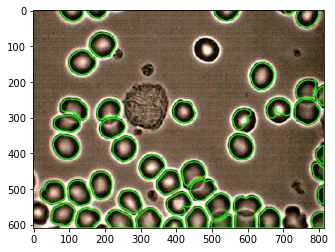

In [2362]:
image1 = cv2.imread('image.png', cv2.COLOR_BGR2GRAY)
image1[markers2==255] = [0,255,0]
plt.imshow(image1,cmap='gray')
count